In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/vrosa786/Evaluation-Projects/main/Baseball%20Case%20Study/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [10]:
print("Data structure", df.shape)

Data structure (30, 17)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [12]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<Axes: >

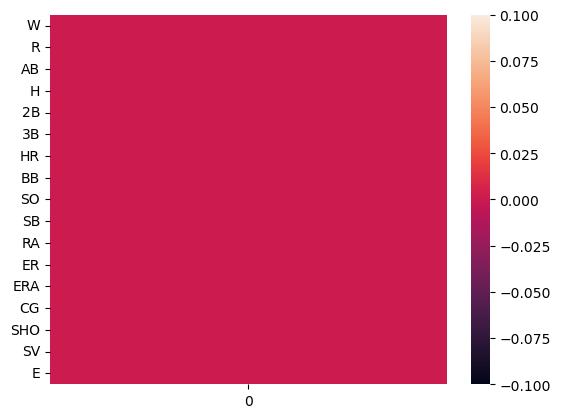

In [14]:
sns.heatmap(df.isnull().sum().to_frame())

In [28]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

0.047088688953686085


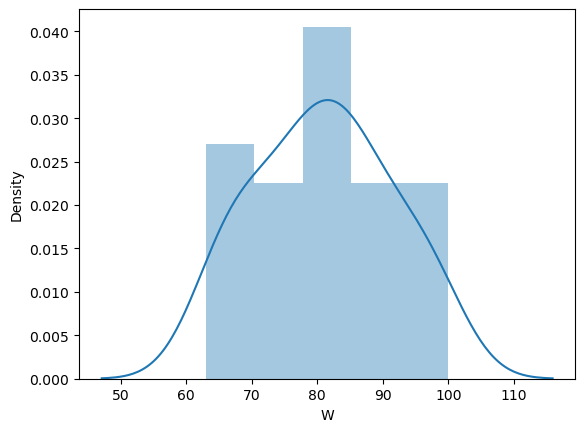

In [9]:
    sns.distplot(df['W'],kde=True)
    print(df['W'].skew())

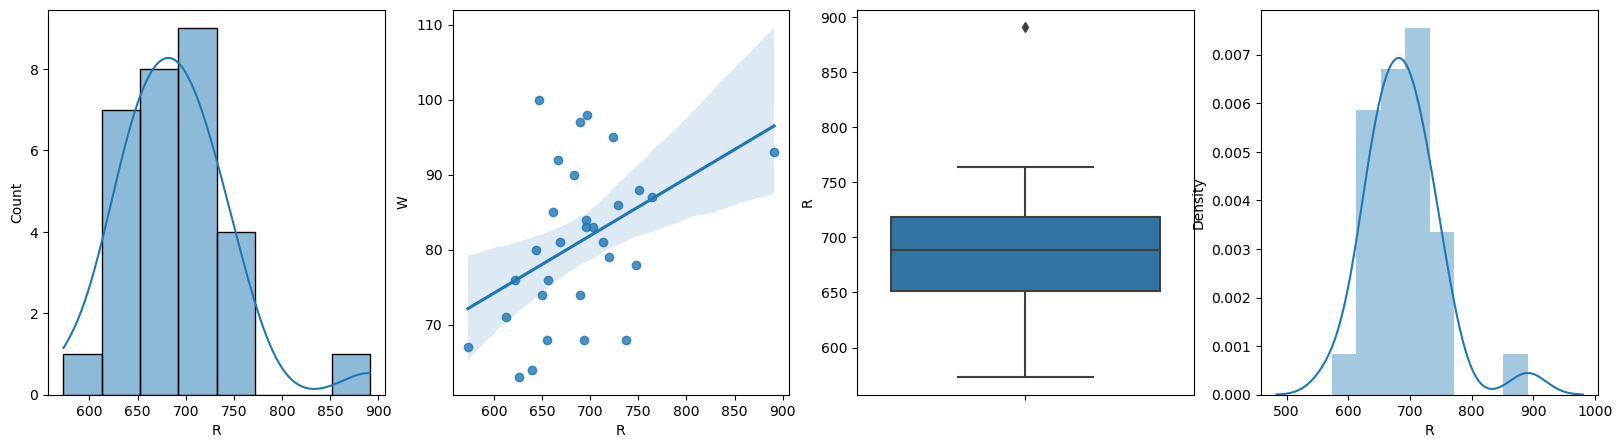

SKEWNESS  1.2007863569707353


In [47]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.histplot(x='R',data=df,kde=True)
plt.subplot(1,4,2)
sns.regplot(x='R',y='W',data=df)
plt.subplot(1,4,3)
sns.boxplot(y='R',data=df)
plt.subplot(1,4,4)
sns.distplot(df['R'],kde=True)
plt.show()
print("SKEWNESS ", df['R'].skew())

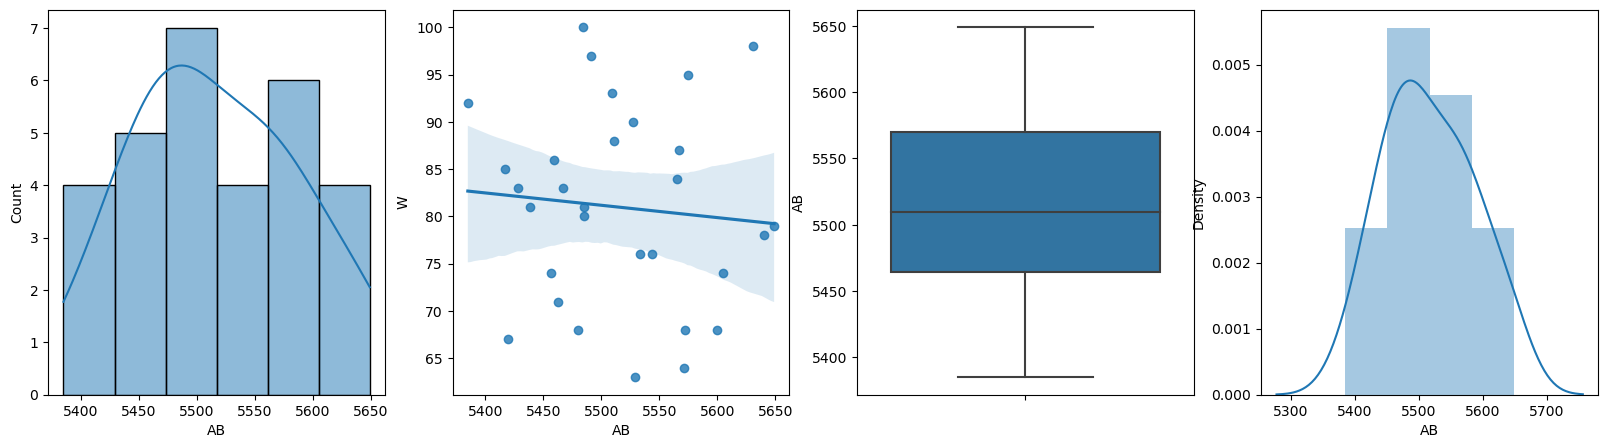

SKEWNESS  0.18343655908507983


In [48]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.histplot(x='AB',data=df,kde=True)
plt.subplot(1,4,2)
sns.regplot(x='AB',y='W',data=df)
plt.subplot(1,4,3)
sns.boxplot(y='AB',data=df)
plt.subplot(1,4,4)
sns.distplot(df['AB'],kde=True)
plt.show()
print("SKEWNESS ", df['AB'].skew())

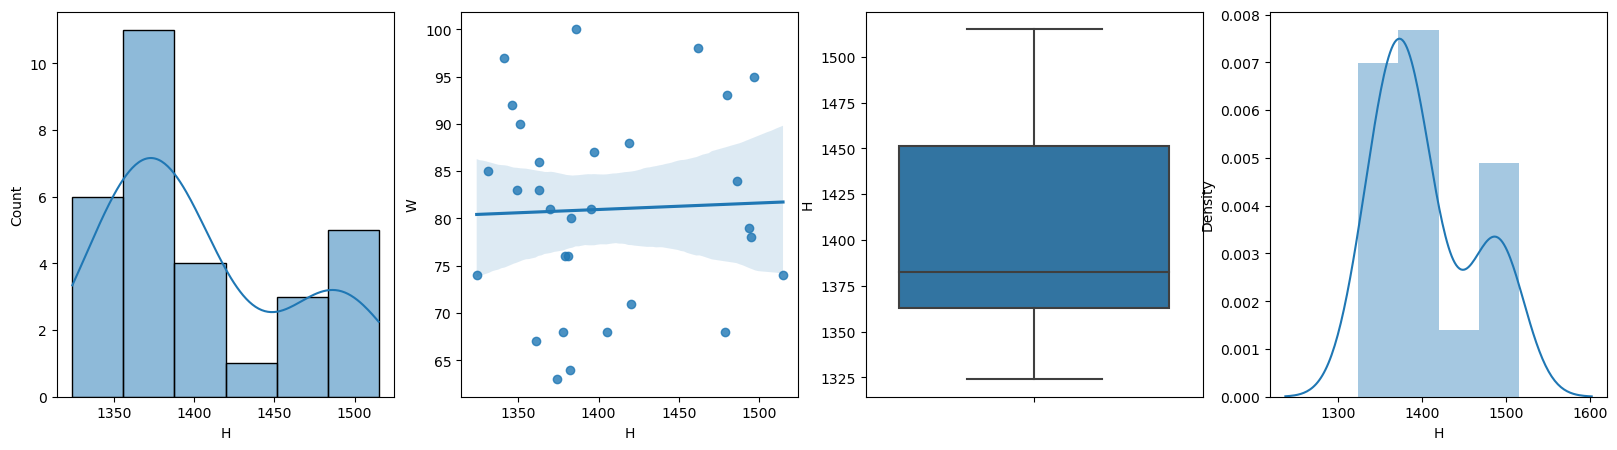

SKEWNESS  0.6702537173217267


In [49]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.histplot(x='H',data=df,kde=True)
plt.subplot(1,4,2)
sns.regplot(x='H',y='W',data=df)
plt.subplot(1,4,3)
sns.boxplot(y='H',data=df)
plt.subplot(1,4,4)
sns.distplot(df['H'],kde=True)
plt.show()
print("SKEWNESS ", df['H'].skew())

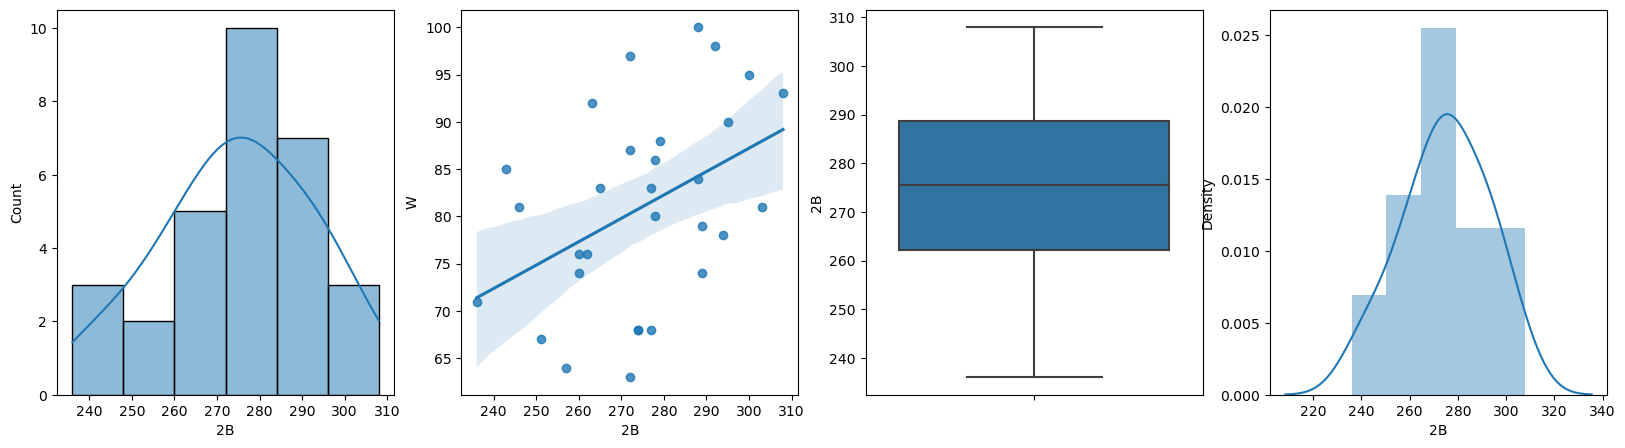

SKEWNESS  -0.23064991757259148


In [50]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.histplot(x='2B',data=df,kde=True)
plt.subplot(1,4,2)
sns.regplot(x='2B',y='W',data=df)
plt.subplot(1,4,3)
sns.boxplot(y='2B',data=df)
plt.subplot(1,4,4)
sns.distplot(df['2B'],kde=True)
plt.show()
print("SKEWNESS ", df['2B'].skew())

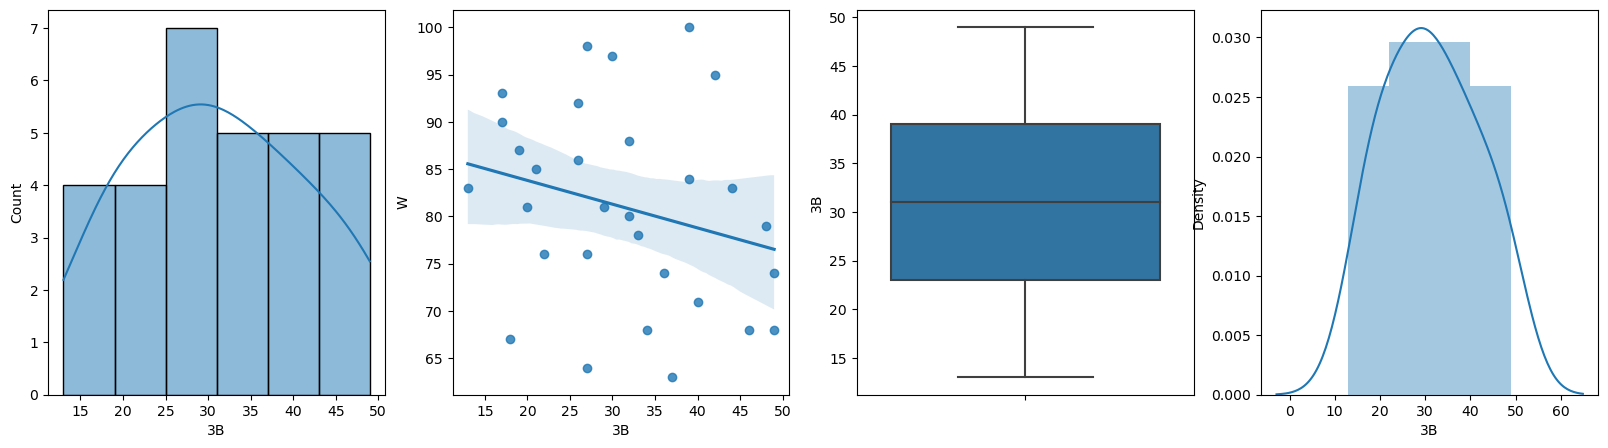

SKEWNESS  0.129502450836424


In [51]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.histplot(x='3B',data=df,kde=True)
plt.subplot(1,4,2)
sns.regplot(x='3B',y='W',data=df)
plt.subplot(1,4,3)
sns.boxplot(y='3B',data=df)
plt.subplot(1,4,4)
sns.distplot(df['3B'],kde=True)
plt.show()
print("SKEWNESS ", df['3B'].skew())

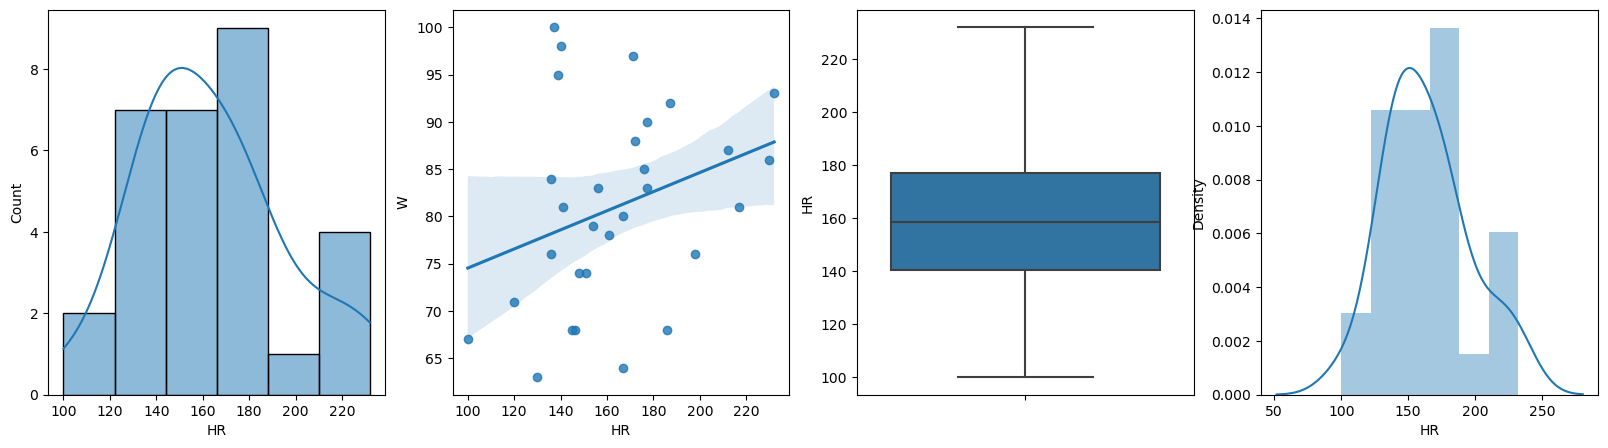

SKEWNESS  0.5164407366297173


In [52]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.histplot(x='HR',data=df,kde=True)
plt.subplot(1,4,2)
sns.regplot(x='HR',y='W',data=df)
plt.subplot(1,4,3)
sns.boxplot(y='HR',data=df)
plt.subplot(1,4,4)
sns.distplot(df['HR'],kde=True)
plt.show()
print("SKEWNESS ", df['HR'].skew())

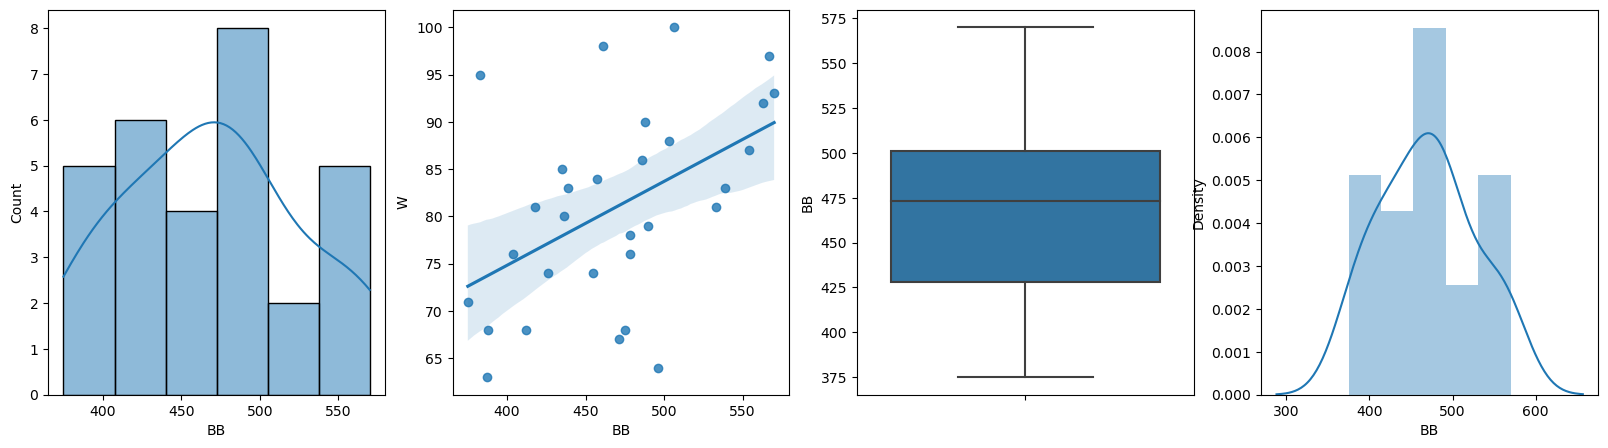

SKEWNESS  0.15849848440330838


In [53]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.histplot(x='BB',data=df,kde=True)
plt.subplot(1,4,2)
sns.regplot(x='BB',y='W',data=df)
plt.subplot(1,4,3)
sns.boxplot(y='BB',data=df)
plt.subplot(1,4,4)
sns.distplot(df['BB'],kde=True)
plt.show()
print("SKEWNESS ", df['BB'].skew())

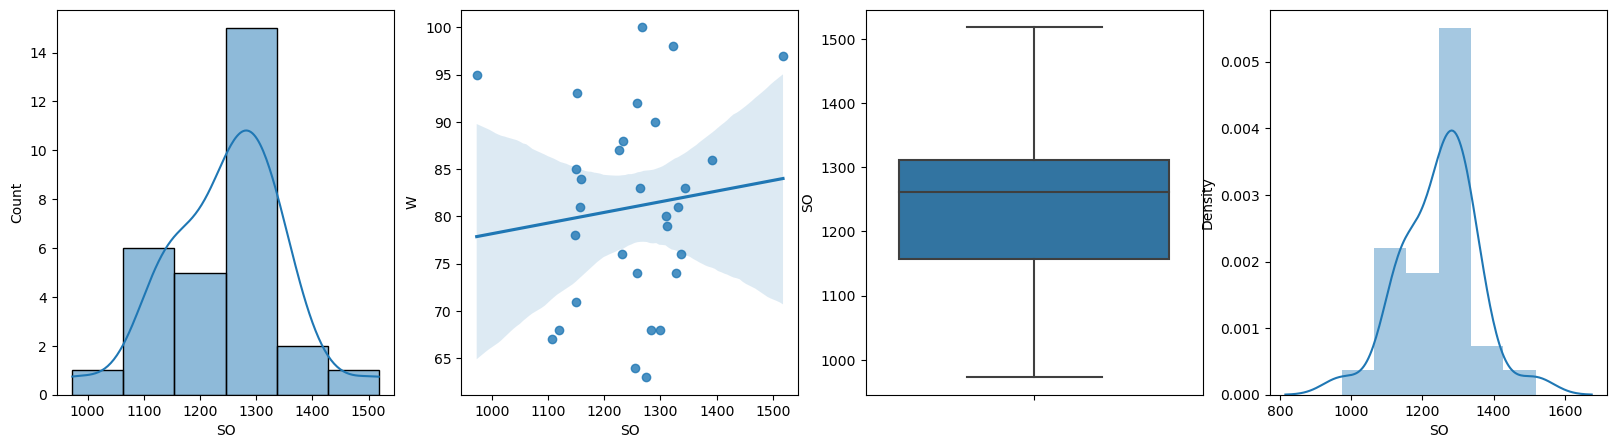

SKEWNESS  -0.1560654813644833


In [54]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.histplot(x='SO',data=df,kde=True)
plt.subplot(1,4,2)
sns.regplot(x='SO',y='W',data=df)
plt.subplot(1,4,3)
sns.boxplot(y='SO',data=df)
plt.subplot(1,4,4)
sns.distplot(df['SO'],kde=True)
plt.show()
print("SKEWNESS ", df['SO'].skew())

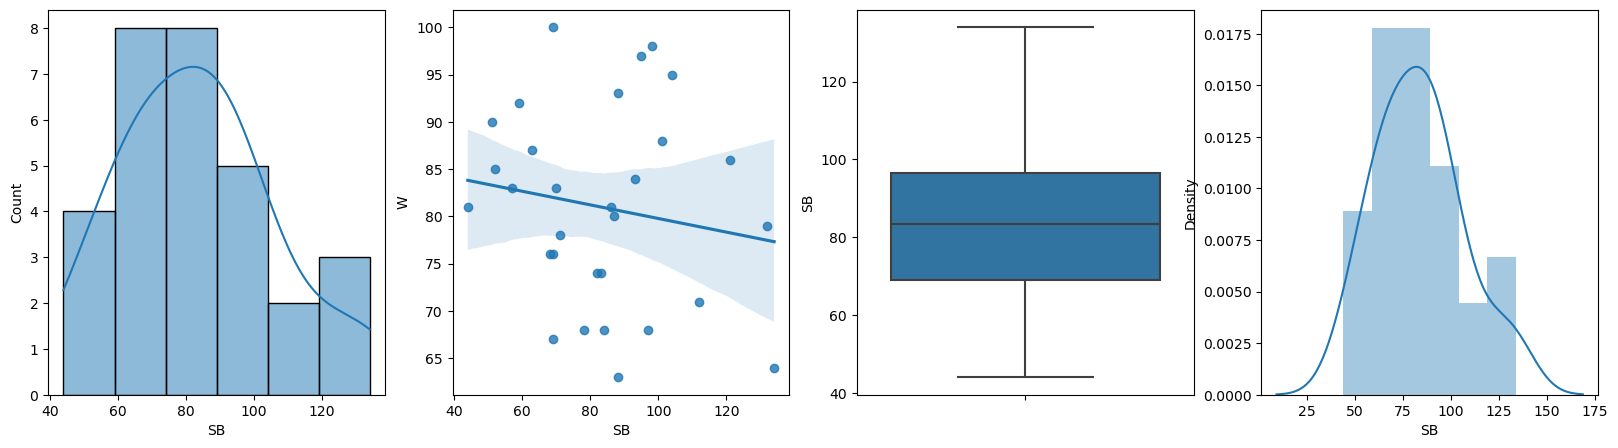

SKEWNESS  0.4798928679573835


In [55]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.histplot(x='SB',data=df,kde=True)
plt.subplot(1,4,2)
sns.regplot(x='SB',y='W',data=df)
plt.subplot(1,4,3)
sns.boxplot(y='SB',data=df)
plt.subplot(1,4,4)
sns.distplot(df['SB'],kde=True)
plt.show()
print("SKEWNESS ", df['SB'].skew())

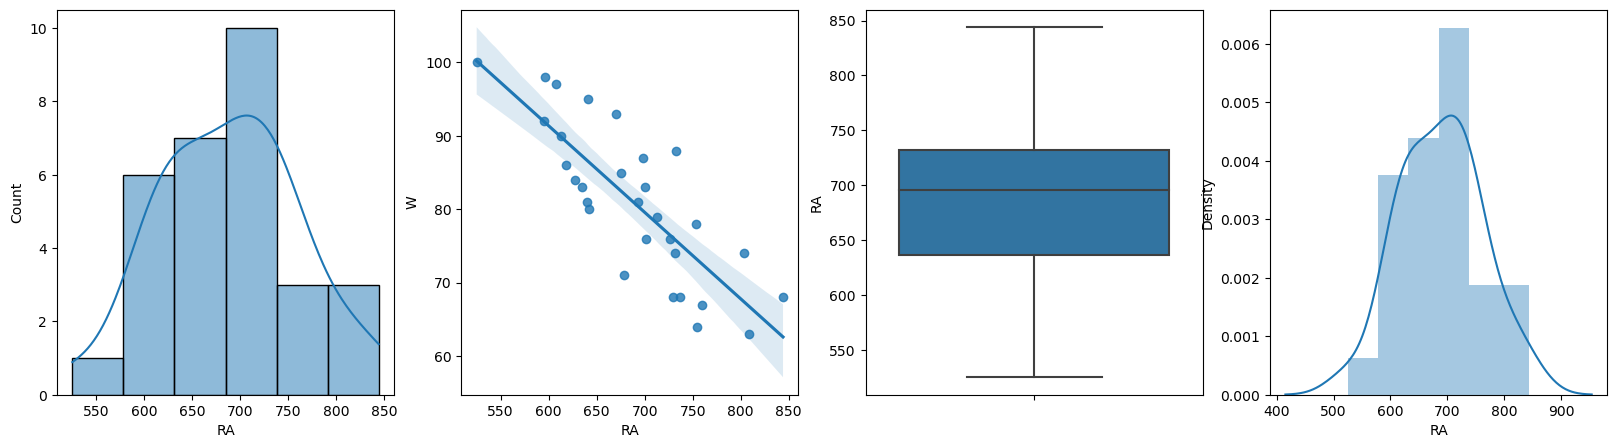

SKEWNESS  0.04573397531336112


In [56]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.histplot(x='RA',data=df,kde=True)
plt.subplot(1,4,2)
sns.regplot(x='RA',y='W',data=df)
plt.subplot(1,4,3)
sns.boxplot(y='RA',data=df)
plt.subplot(1,4,4)
sns.distplot(df['RA'],kde=True)
plt.show()
print("SKEWNESS ", df['RA'].skew())

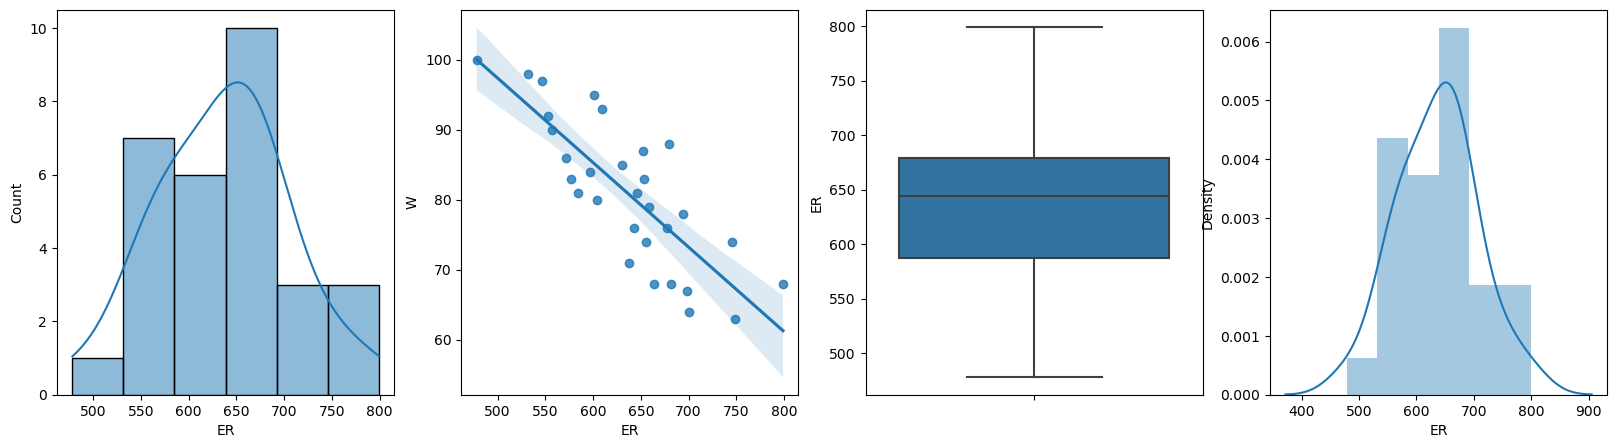

SKEWNESS  0.05870979570981254


In [57]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.histplot(x='ER',data=df,kde=True)
plt.subplot(1,4,2)
sns.regplot(x='ER',y='W',data=df)
plt.subplot(1,4,3)
sns.boxplot(y='ER',data=df)
plt.subplot(1,4,4)
sns.distplot(df['ER'],kde=True)
plt.show()
print("SKEWNESS ", df['ER'].skew())

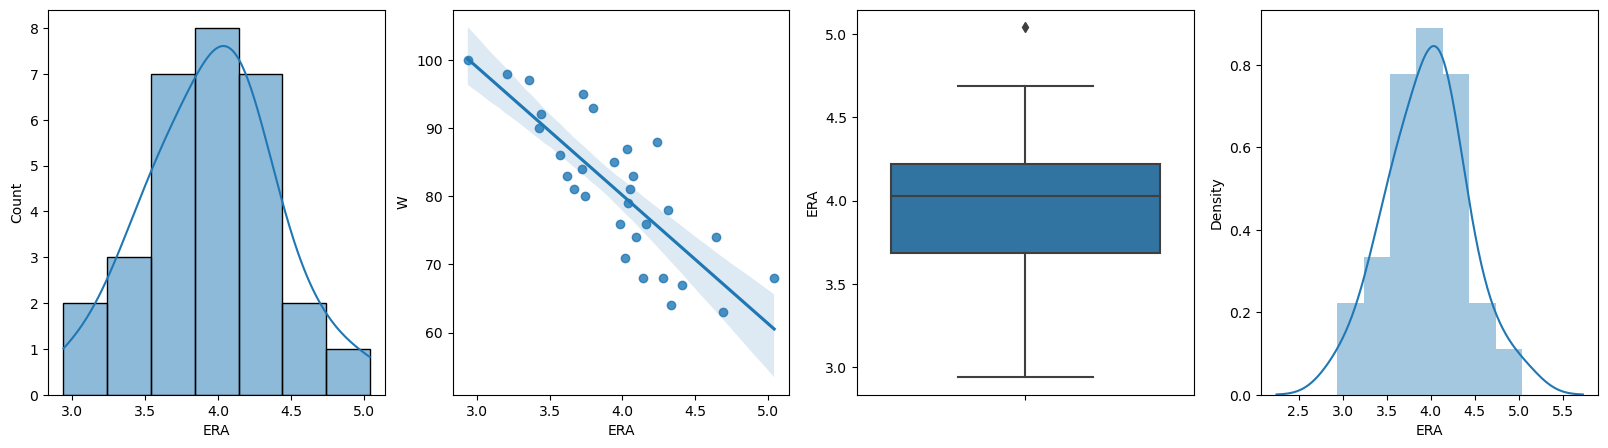

SKEWNESS  0.053331339494040286


In [58]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.histplot(x='ERA',data=df,kde=True)
plt.subplot(1,4,2)
sns.regplot(x='ERA',y='W',data=df)
plt.subplot(1,4,3)
sns.boxplot(y='ERA',data=df)
plt.subplot(1,4,4)
sns.distplot(df['ERA'],kde=True)
plt.show()
print("SKEWNESS ", df['ERA'].skew())

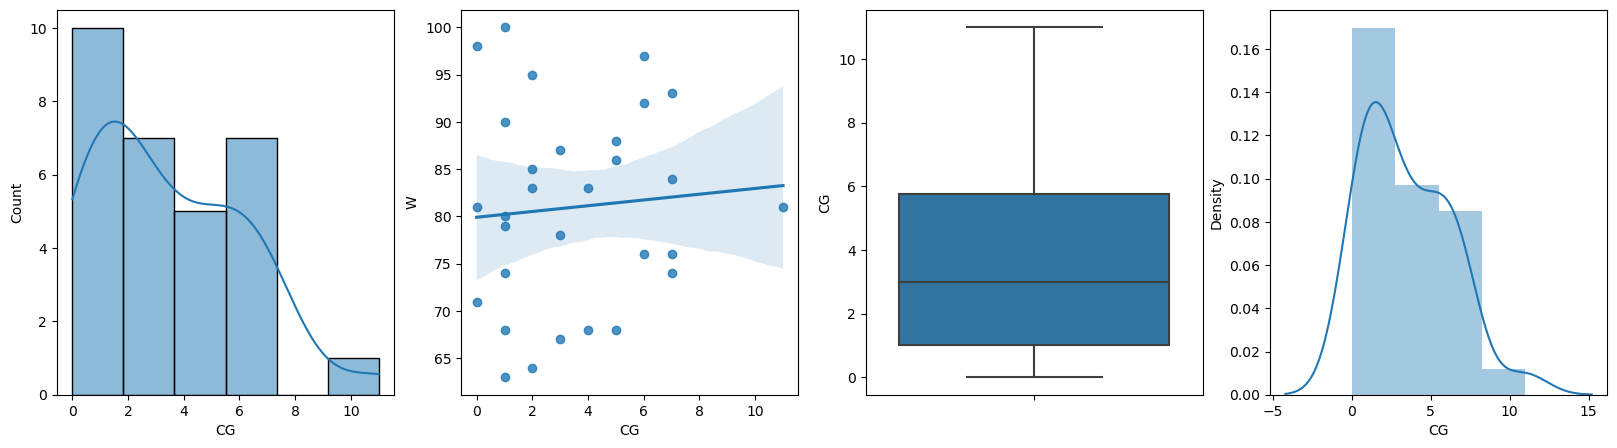

SKEWNESS  0.7368452725826206


In [59]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.histplot(x='CG',data=df,kde=True)
plt.subplot(1,4,2)
sns.regplot(x='CG',y='W',data=df)
plt.subplot(1,4,3)
sns.boxplot(y='CG',data=df)
plt.subplot(1,4,4)
sns.distplot(df['CG'],kde=True)
plt.show()
print("SKEWNESS ", df['CG'].skew())

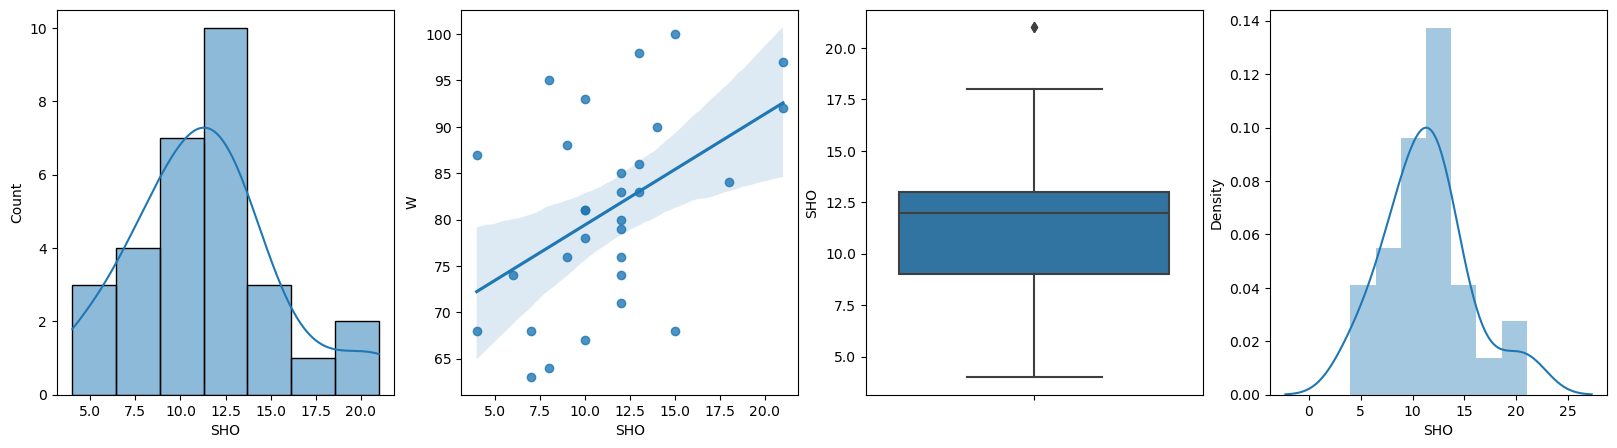

SKEWNESS  0.5657904298216165


In [60]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.histplot(x='SHO',data=df,kde=True)
plt.subplot(1,4,2)
sns.regplot(x='SHO',y='W',data=df)
plt.subplot(1,4,3)
sns.boxplot(y='SHO',data=df)
plt.subplot(1,4,4)
sns.distplot(df['SHO'],kde=True)
plt.show()
print("SKEWNESS ", df['SHO'].skew())

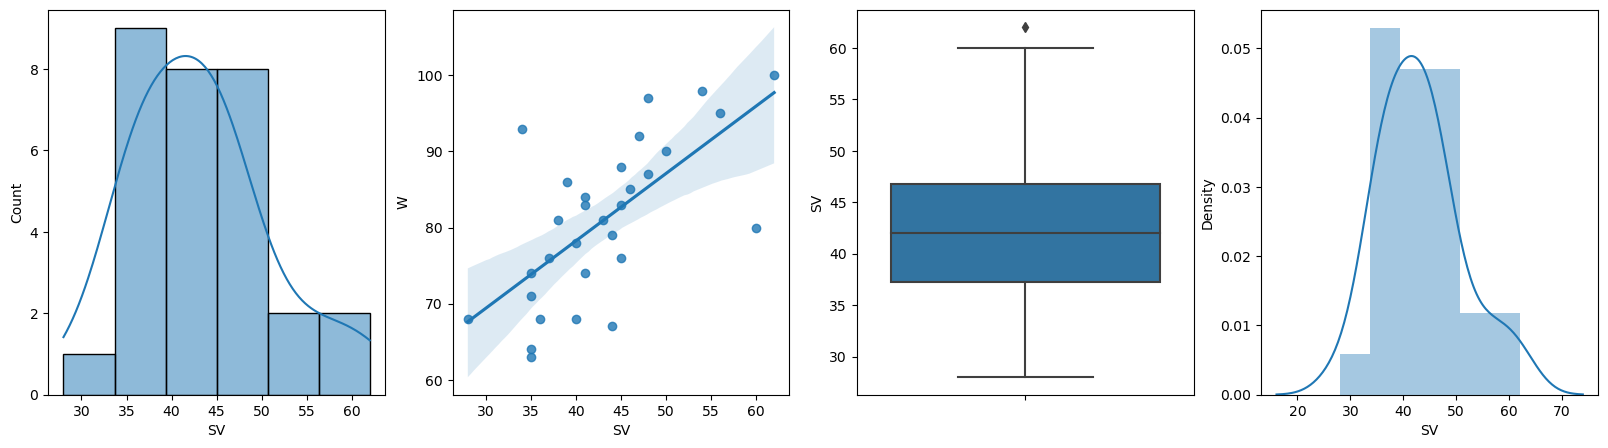

SKEWNESS  0.6575235461553925


In [61]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.histplot(x='SV',data=df,kde=True)
plt.subplot(1,4,2)
sns.regplot(x='SV',y='W',data=df)
plt.subplot(1,4,3)
sns.boxplot(y='SV',data=df)
plt.subplot(1,4,4)
sns.distplot(df['SV'],kde=True)
plt.show()
print("SKEWNESS ", df['SV'].skew())

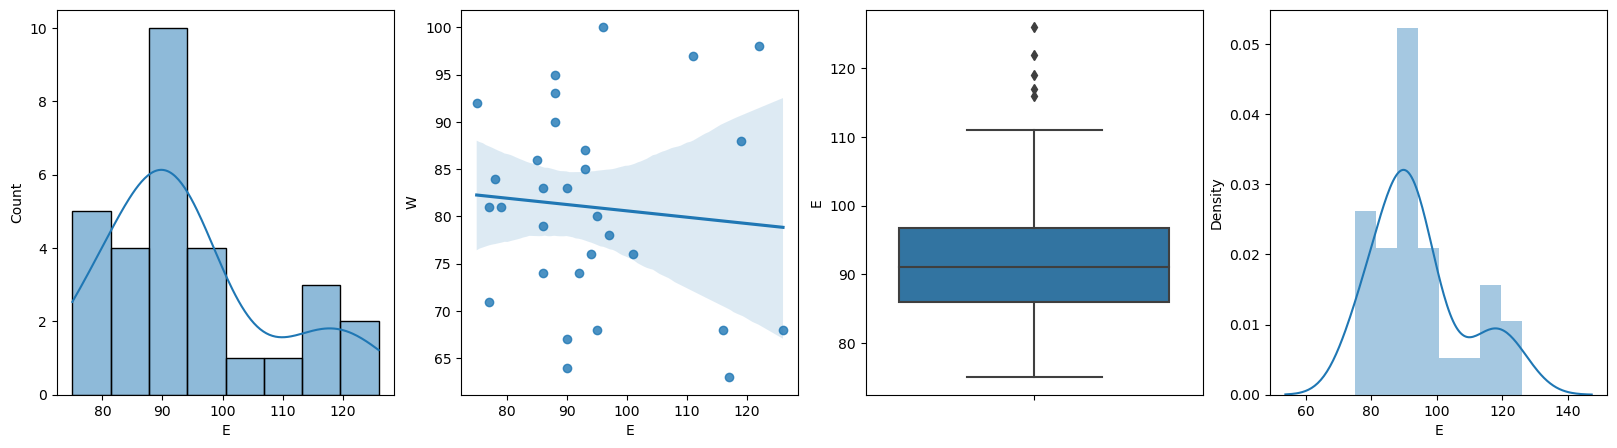

SKEWNESS  0.8901318267689016


In [62]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.histplot(x='E',data=df,kde=True)
plt.subplot(1,4,2)
sns.regplot(x='E',y='W',data=df)
plt.subplot(1,4,3)
sns.boxplot(y='E',data=df)
plt.subplot(1,4,4)
sns.distplot(df['E'],kde=True)
plt.show()
print("SKEWNESS ", df['E'].skew())

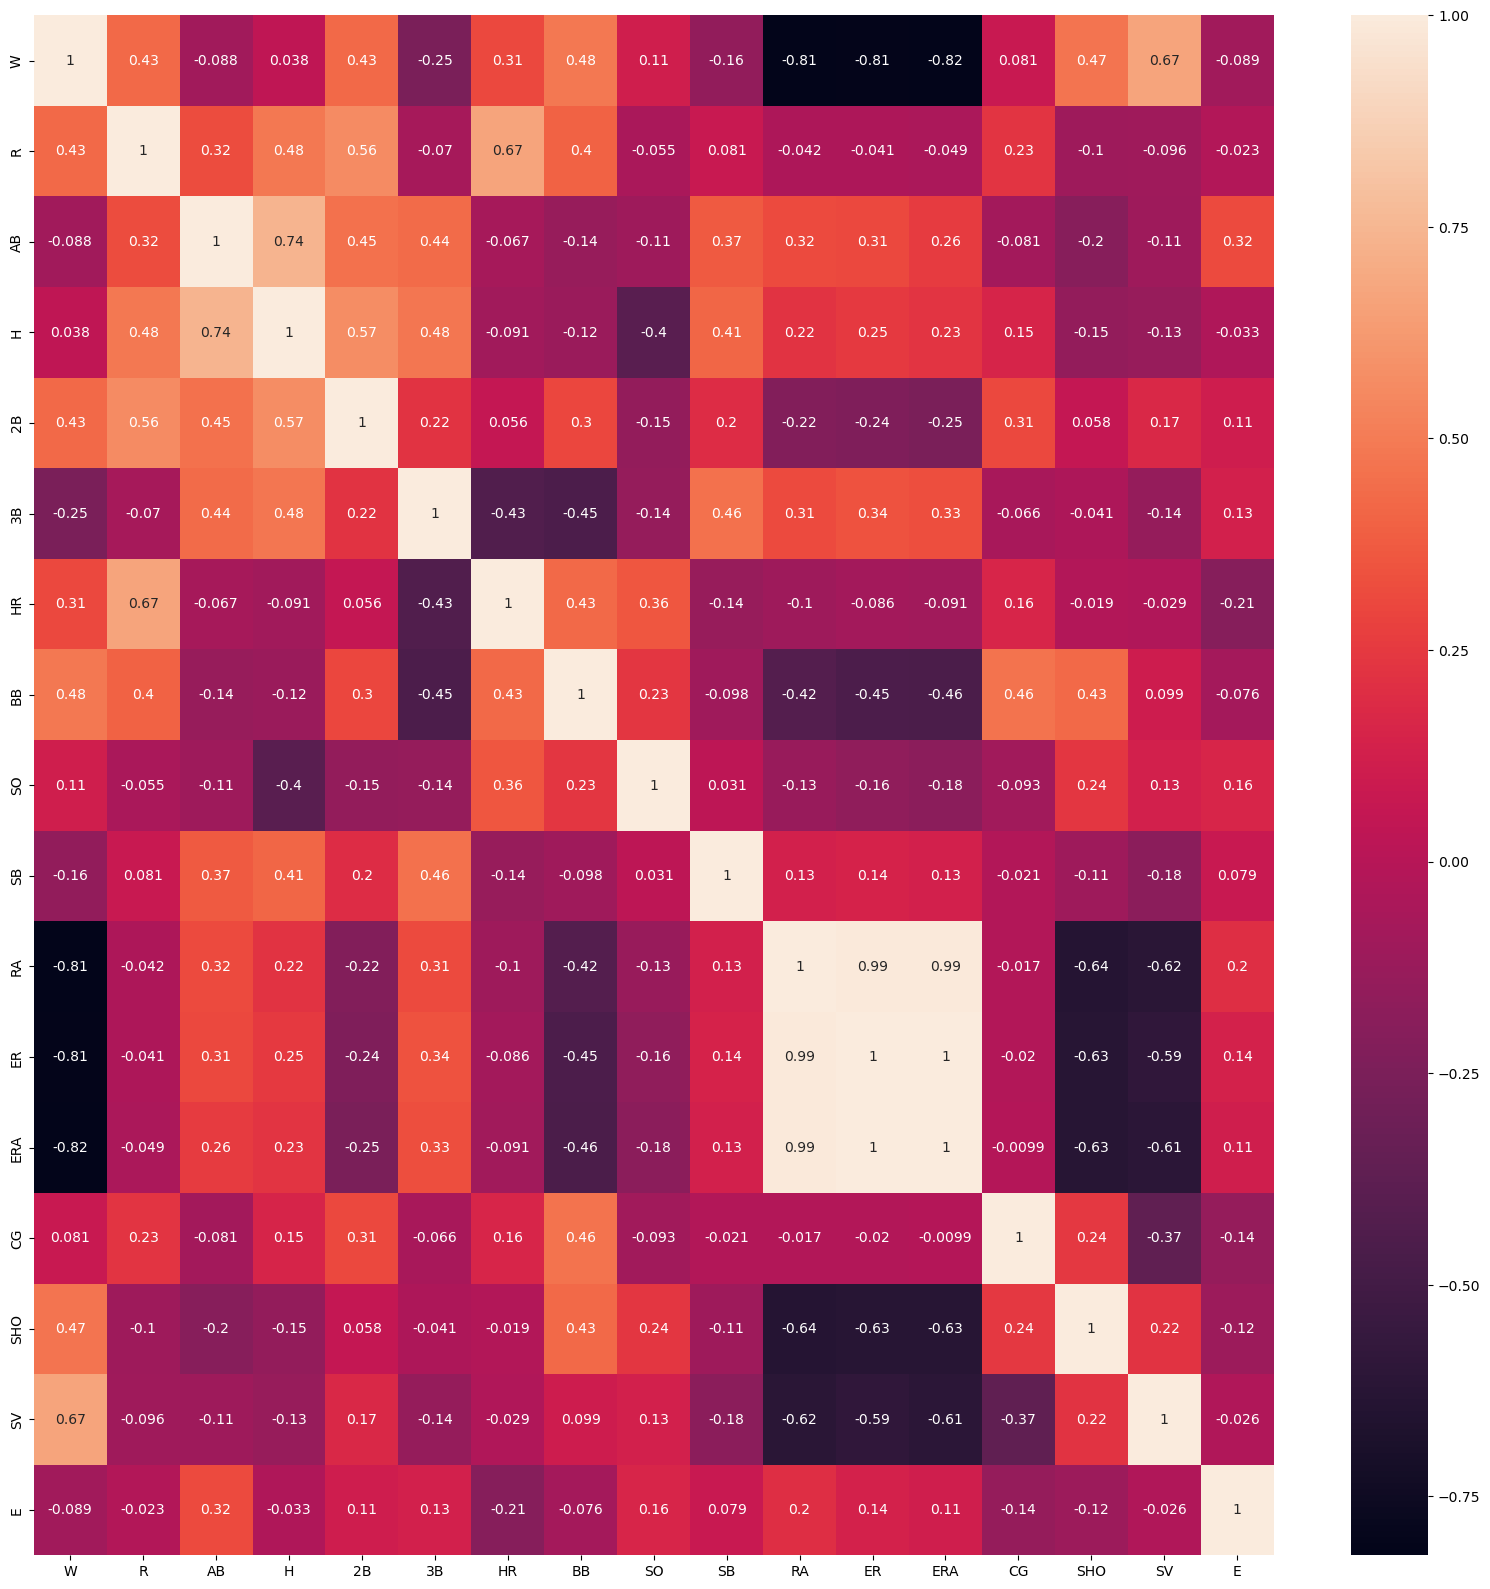

In [65]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

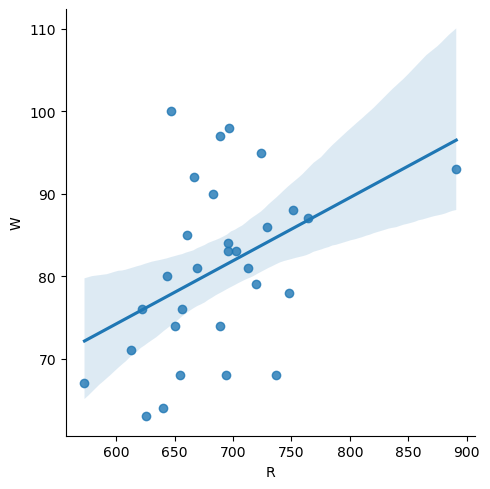

In [11]:
sns.lmplot(x='R',y='W',data=df,palette ='colorblind')

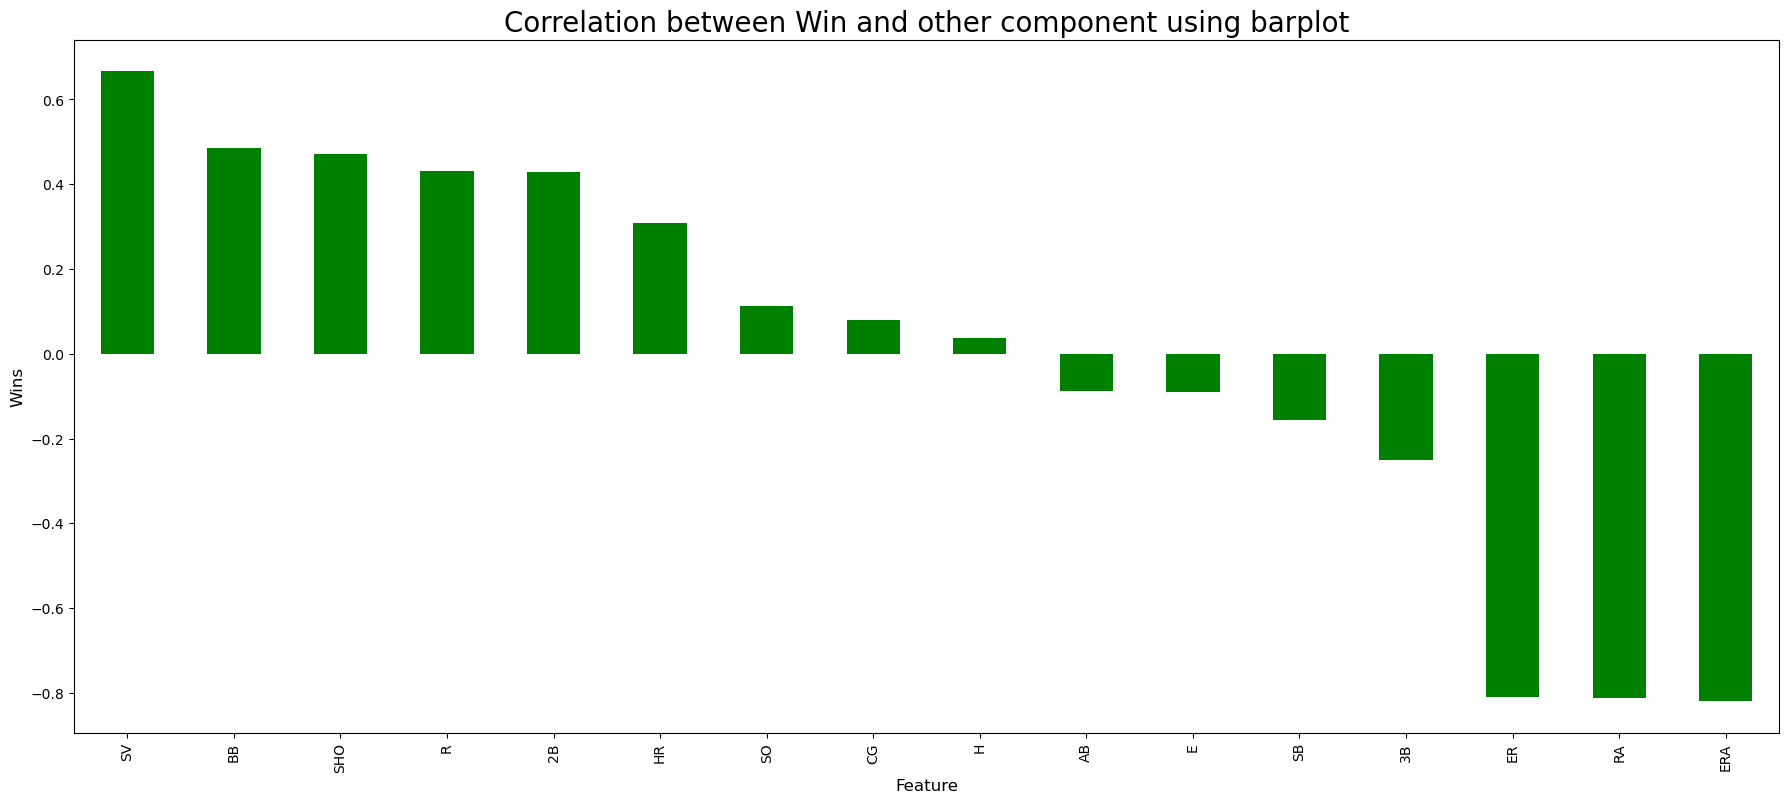

In [21]:
plt.figure(figsize=(22,9))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color ="green")
plt.xlabel('Feature', fontsize = 12)
plt.ylabel('Wins', fontsize = 12)
plt.title("Correlation between Win and other component using barplot", fontsize = 20)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [9]:
x=df.drop("W",axis =1)
y=df["W"]

In [12]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc= r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"on Random_state ",maxRS)      

Maximum r2 score is  0.9172122929401253 on Random_state  114


In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=maxRS)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [17]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print('R2_Score: ',r2_score(y_test,pred_LR))
print('R2_Score on training data : ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error : ',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error : ',mean_squared_error(y_test,pred_LR))
print('Root mean squared error : ',np.sqrt(mean_squared_error(y_test,pred_LR)))


R2_Score:  0.9172122929401253
R2_Score on training data :  94.45885375503715
Mean Absolute Error :  2.782006211266935
Mean Squared Error :  10.633621040135017
Root mean squared error :  3.2609233416526395
